## This notebook focusses on a algorithm that can deal with temporal data, like: ARIMA

In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [6]:
from datetime import datetime
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d').date()

df = pd.read_csv("data/new_data_no_missingvalues.csv", parse_dates=['date'], date_parser=parser)

In [7]:
df

,Unnamed: 0,unique_id,id,date,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game
0,0,2014-02-26_AS14.01,AS14.01,2014-02-26,6.25,0.0,0.0,0.000000,6.25,0.000000,0.750000,-0.250000,0.000000,0.000,0.000000,0.0
1,1,2014-03-21_AS14.01,AS14.01,2014-03-21,6.25,6.0,0.0,55.095526,6.40,75.141667,0.200000,0.200000,6.193000,57.402,53.024000,0.0
2,2,2014-03-22_AS14.01,AS14.01,2014-03-22,6.40,0.0,0.0,51.697063,6.80,36.636000,0.698649,0.600000,7.025333,0.000,46.662000,0.0
3,3,2014-03-23_AS14.01,AS14.01,2014-03-23,6.80,0.0,0.0,53.442031,6.00,50.046611,0.800000,0.200000,10.850750,0.000,31.448667,0.0
4,4,2014-03-24_AS14.01,AS14.01,2014-03-24,6.00,0.0,0.0,47.541687,6.75,74.968047,0.000000,0.800000,5.684333,3.010,122.121375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1210,2014-05-25_AS14.33,AS14.33,2014-05-25,6.25,3.0,8.0,34.829867,5.40,45.534460,0.481111,-0.750000,0.000000,0.000,64.738667,0.0
1211,1211,2014-05-26_AS14.33,AS14.33,2014-05-26,5.40,10.0,3.0,34.320472,6.20,111.046204,0.000000,-0.400000,0.000000,130.530,68.876900,0.0
1212,1212,2014-05-27_AS14.33,AS14.33,2014-05-27,6.20,1.0,2.0,59.382943,8.20,50.259100,0.400000,-0.600000,0.000000,0.000,62.347000,0.0
1213,1213,2014-05-28_AS14.33,AS14.33,2014-05-28,8.20,10.0,1.0,37.238750,7.00,99.281685,1.200000,0.000000,0.000000,0.000,43.907571,0.0


In [8]:
dfp = df.drop(["date", "id", "unique_id", "Unnamed: 0", "total_calls", "total_sms", "average_com", "average_soc", "average_finance", "average_entertainment"], axis=1)

In [9]:
dfp = dfp/dfp.std(0)
dfp = minmax_scaling(dfp, columns=dfp.columns)

In [ ]:
dfp.insert(loc=0, column='date', value=df['date'])
dfp.insert(loc=0, column='id', value=df['id'])

In [ ]:
dfp.set_index('date', inplace=True)
dfp.index.to_pydatetime()

,id,average_mood,mood_next_day,average_valence,average_arousal,average_office,average_game
date,,,,,,,
2014-02-26,AS14.01,0.513158,0.513158,0.615385,0.437500,0.000000,0.0
2014-03-21,AS14.01,0.513158,0.536842,0.446154,0.550000,0.038399,0.0
2014-03-22,AS14.01,0.536842,0.600000,0.599584,0.650000,0.000000,0.0
2014-03-23,AS14.01,0.600000,0.473684,0.630769,0.550000,0.000000,0.0
2014-03-24,AS14.01,0.473684,0.592105,0.384615,0.700000,0.002014,0.0
...,...,...,...,...,...,...,...
2014-05-25,AS14.33,0.513158,0.378947,0.532650,0.312500,0.000000,0.0
2014-05-26,AS14.33,0.378947,0.505263,0.384615,0.400000,0.087319,0.0
2014-05-27,AS14.33,0.505263,0.821053,0.507692,0.350000,0.000000,0.0


In [11]:
# dfp.to_csv("./data/final_dataset.csv")

In [ ]:
list_ids = dfp.id.unique()
list_dfs = [] 
for x in list_ids:
    window = dfp.loc[dfp['id'] == x]
    df_cor = window.drop(["id"], axis=1)
    list_dfs.append(df_cor)

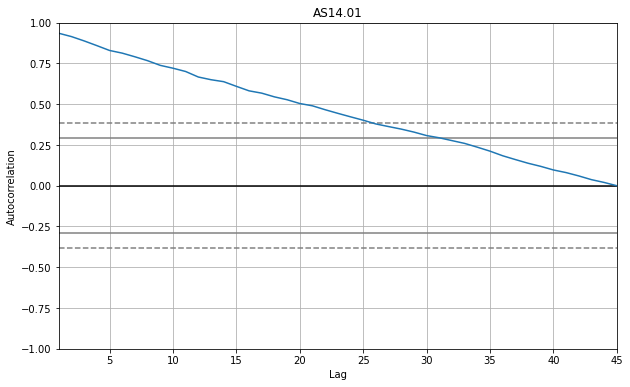

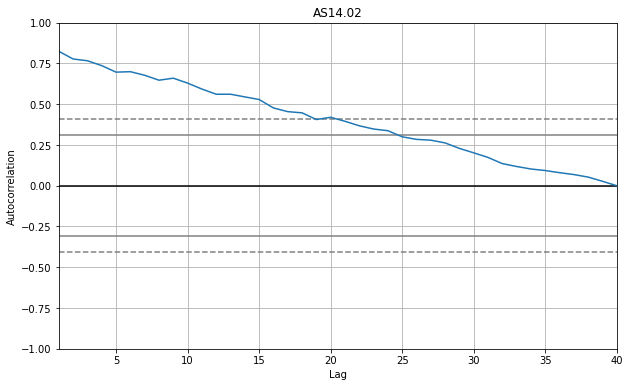

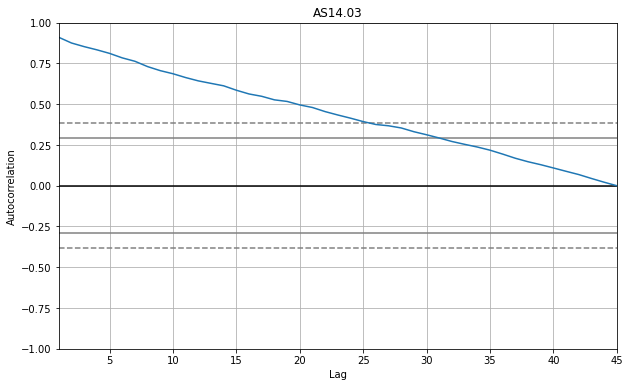

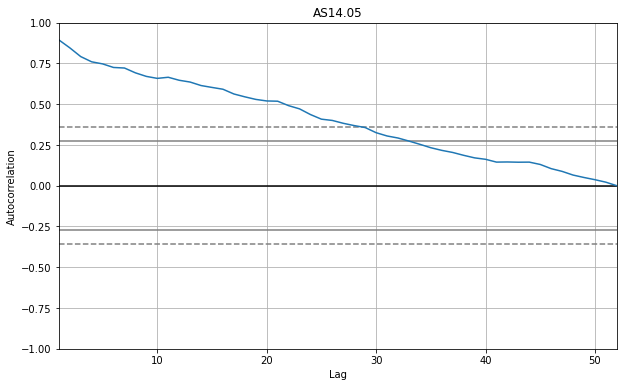

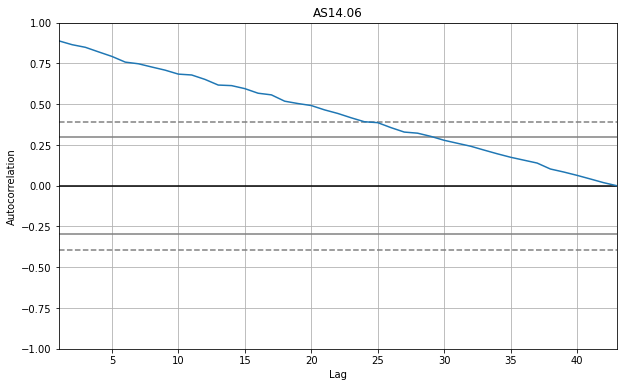

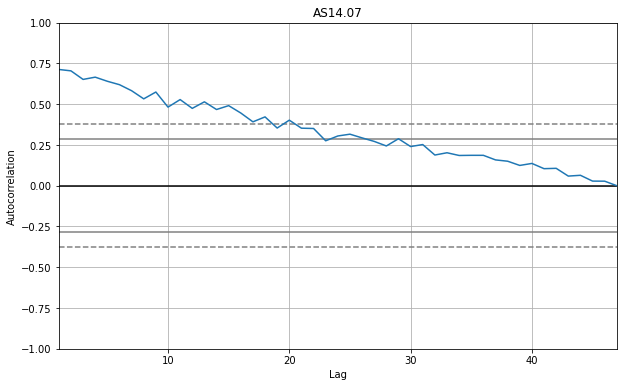

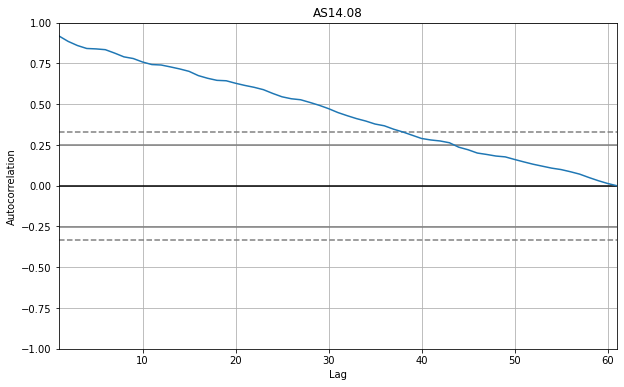

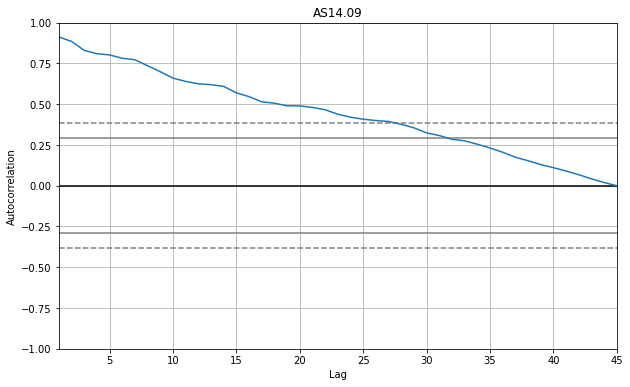

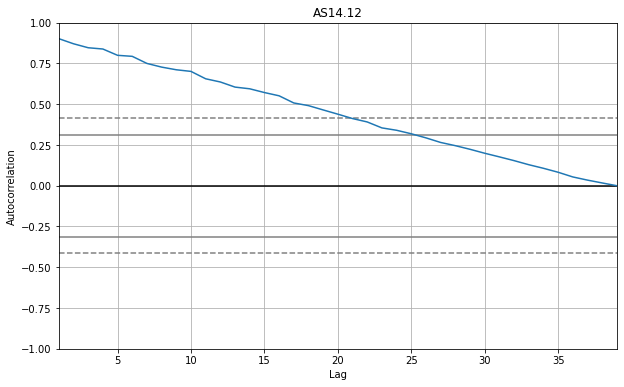

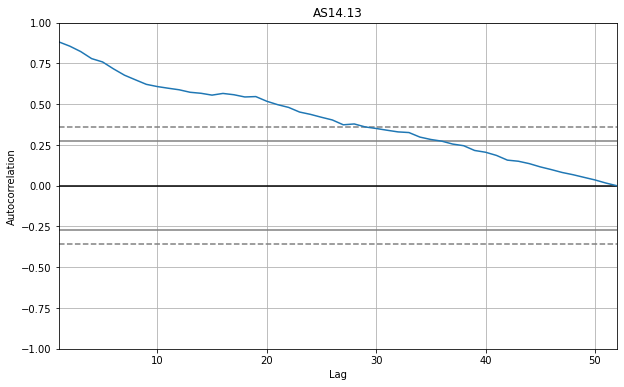

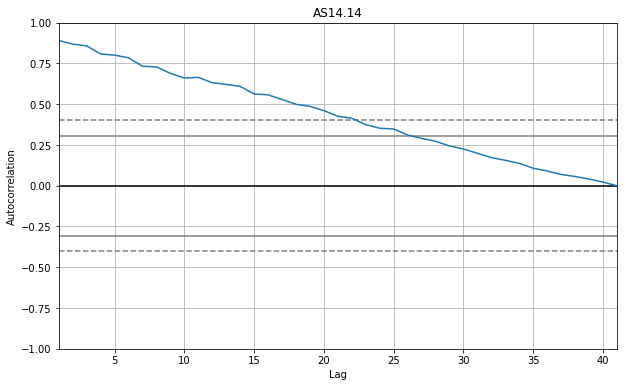

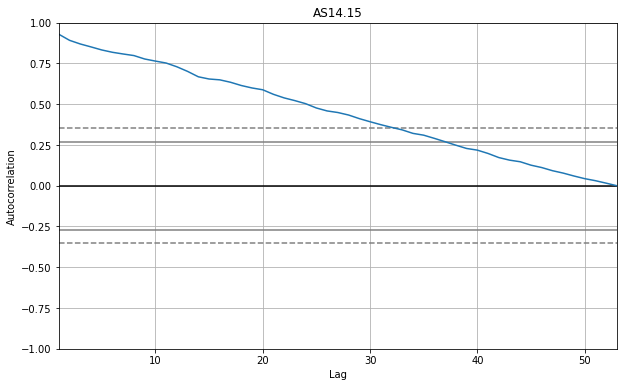

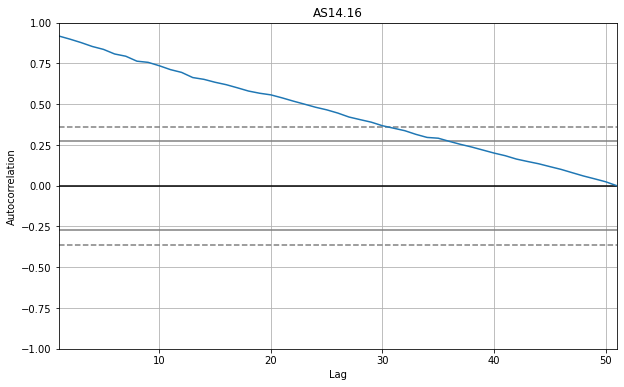

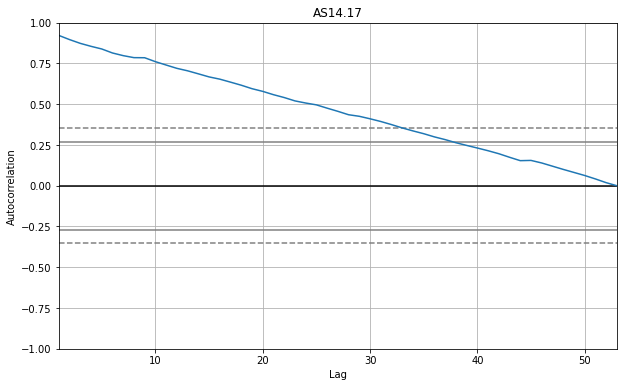

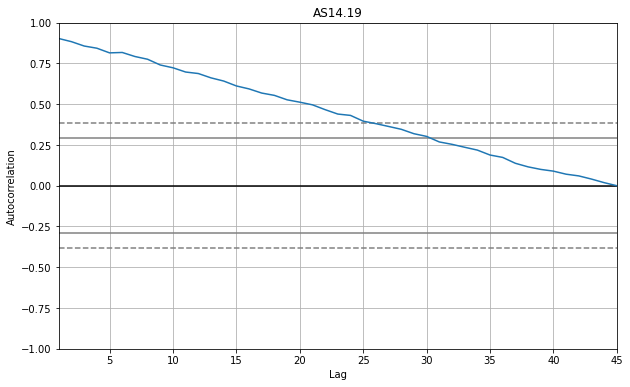

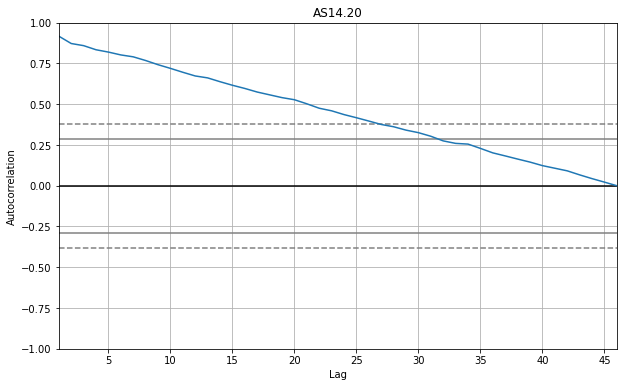

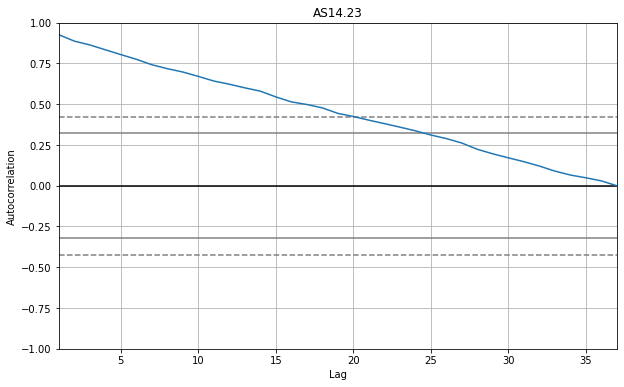

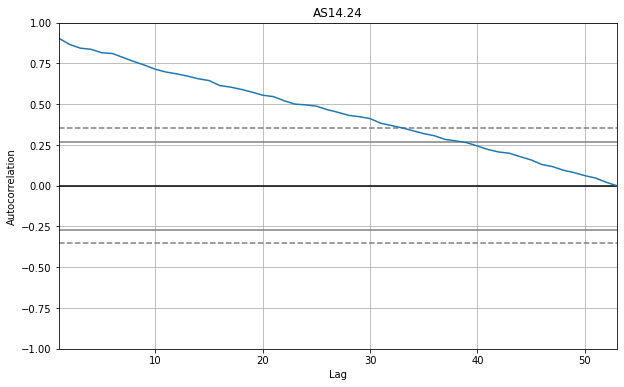

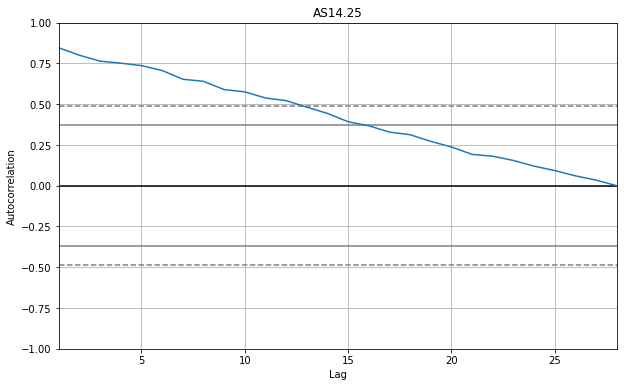

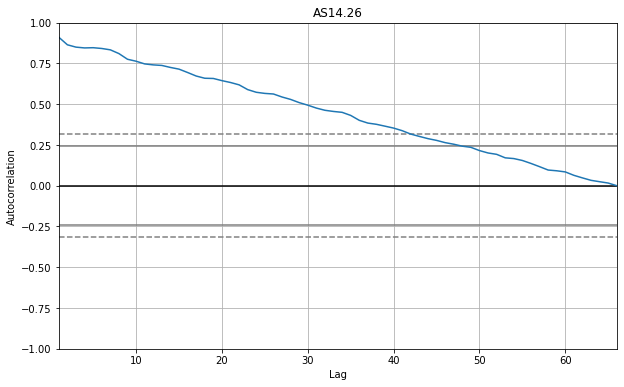

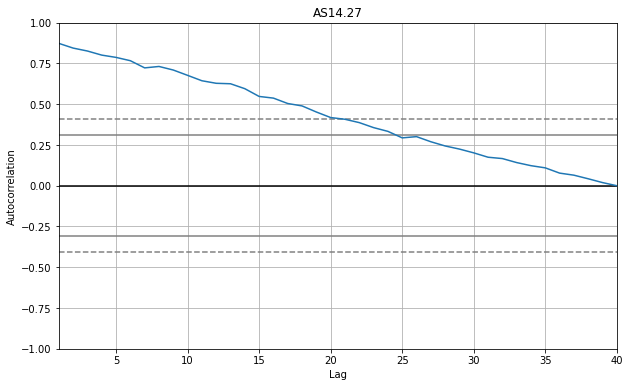

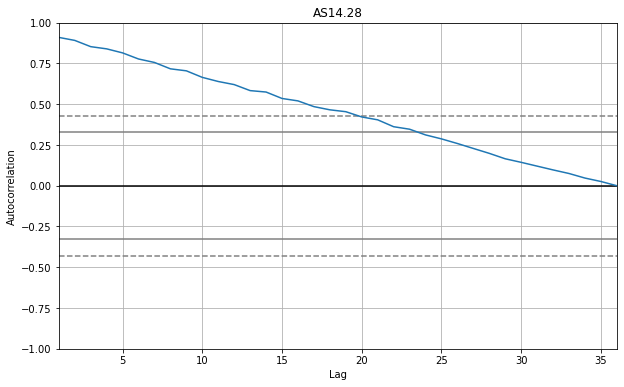

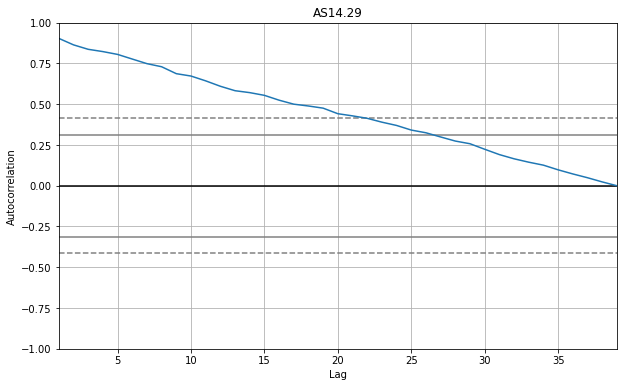

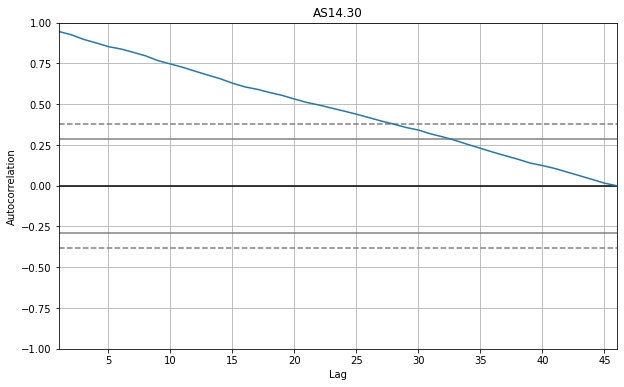

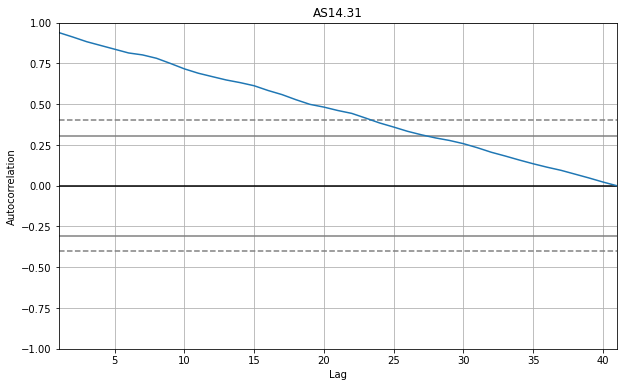

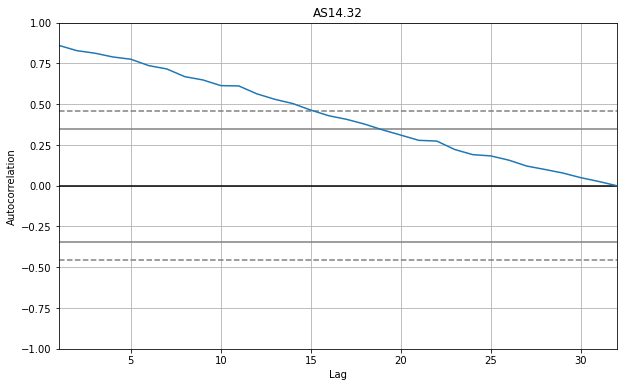

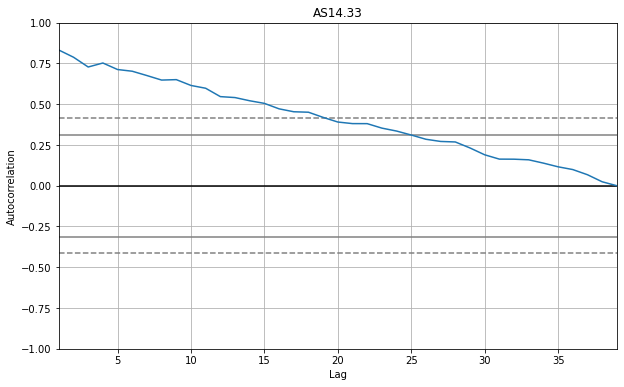

In [ ]:
for i in range(len(list_dfs)):
    plt.figure(figsize=(10,6))
    autocorrelation_plot(list_dfs[i])
    plt.title(list_ids[i])
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79defa5-2359-4699-82dc-d6bf5eddd7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>